In [3]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
def fig_path(fig_type, fig_folder, recording):
    return '\\'.join([fig_folder, fig_type, recording]) +'.png'

In [1]:
path_to_data = r'C:\Users\Rory\raw_data\SERT_DREADD\spikes_df'
recordings_to_analyse = ['2018-04-18']
fig_folder = r'C:\Users\Rory\raw_data\SERT_DREADD\figures\heat'

In [4]:
if not os.path.exists(fig_folder):
    os.mkdir(fig_folder)

In [7]:
file = '\\'.join([path_to_data, recordings_to_analyse[0]]) + '.csv'
df = pd.read_csv(file, index_col=0)

In [8]:
df.head()

,spike_cluster,time,condition
1,161,0.024200,Baseline
2,356,0.027333,Baseline
6,315,0.078733,Baseline
7,251,0.096967,Baseline
10,364,0.132467,Baseline


In [9]:
# compute mean in first period

baseline = df.loc[df['condition'] == 'Baseline']
mean_firing_rates = baseline.groupby('spike_cluster')['time'].agg(lambda x: x.count() /float(x.max()-x.min()))

In [10]:
df['time'] = pd.to_timedelta(df['time'], unit='s')
df['spike'] = 1
df1 = df.pivot_table(index='time', columns='spike_cluster', values='spike', aggfunc='count')

In [11]:
sec = df1.resample('s').count()

In [12]:
rolling = sec.rolling(60*2).mean()

In [13]:
tidy_rolling = rolling.reset_index().melt(id_vars='time', value_name='mean_firing_rate').set_index('spike_cluster')

In [14]:
normed= tidy_rolling.groupby('time').apply(lambda group: group['mean_firing_rate'].divide(mean_firing_rates))

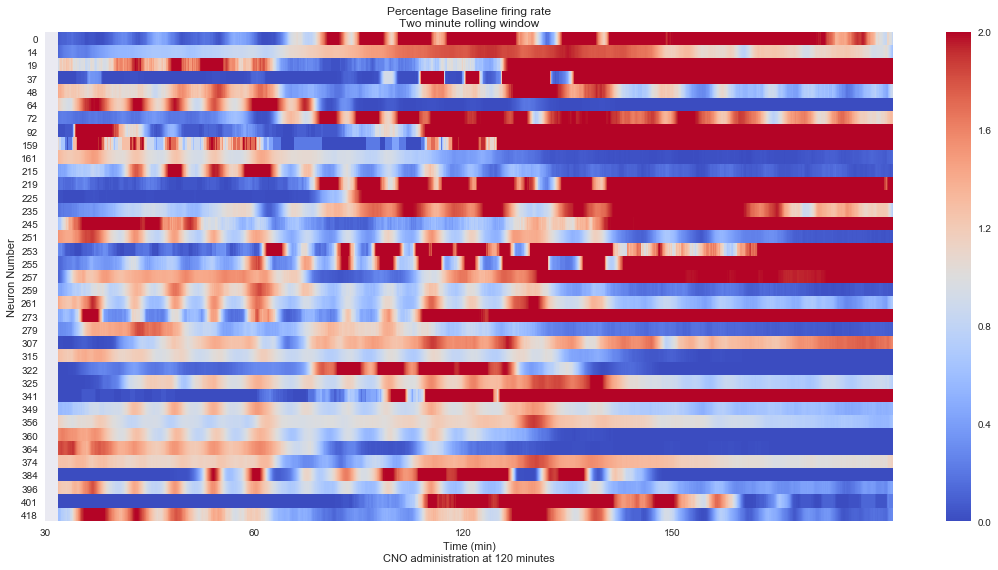

In [19]:
f, a = plt.subplots(figsize=(19, 9))
sns.heatmap(normed.transpose(), ax=a, cmap='coolwarm', vmin=0, vmax=2, xticklabels=1800)
a.set_ylabel('Neuron Number')
a.set_title('Percentage Baseline firing rate\nTwo minute rolling window')
a.set_xticklabels('30 60 120 150'.split())
a.set_xlabel('Time (min)\nCNO administration at 120 minutes')
plt.savefig(fig_path(fig_type='heat',
                     fig_folder=fig_folder,
                     recording):', dpi=600)